In [1]:
!pip install -q kaggle
import json

data = {"username":"tunkedsaro","key":"ff3d00dc680ff94caf6f8d4d9bcd3168"}
json_data = json.dumps(data)

# Write the JSON string to a file
file_path = "/content/kaggle.json"
with open(file_path, 'w') as json_file:
    json_file.write(json_data)

!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/ #copy api key ---- depend on your directory -- my directory is .../colab/..
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle competitions download -c hackathon-online-data-science-mini-epidemiology
!unzip -q /content/hackathon-online-data-science-mini-epidemiology.zip

!pip -q install autogluon.tabular

from autogluon.tabular import TabularDataset, TabularPredictor
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ref                                                    title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
waqi786/cats-dataset                                   🐾 Cats Dataset                                6KB  2024-07-31 06:12:49           1130         21  1.0              
patricklford/global-ev-sales-2010-2024                 Global EV Sales: 2010-2024                   83KB  2024-07-19 13:40:22           1984         29  1.0              
rabieelkharoua/students-performance-dataset            📚 Students Performance Dataset 📚             66KB  2024-06-12 23:09:20          26054        520  1.0              
ihelon/coffee-sales                                    Coffee Sales                                 13KB  2024-08-01 07:55:34           8974     

In [5]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Define a custom RMSE metric
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def pplot(train_df,province:str):
    # province = "Bangkok"
    Songkhla_df = train_df[train_df['PROVINCE']==province]
    plt.figure(figsize=(14,7))
    for year in Songkhla_df['Year'].unique():
        yearly_data = Songkhla_df[Songkhla_df['Year'] == year]
        plt.plot(yearly_data['Week_no'], yearly_data['Count'], label=f'Year {year}')

    plt.xlabel('Week Number')
    plt.ylabel('Count')
    plt.title(f'{province}')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
train_df  = pd.read_csv("/content/Train_set.csv")
test_df   = pd.read_csv("/content/Test_set.csv")
submit_df = pd.read_csv("/content/sample_submission.csv")

<hr>

# Bangkok

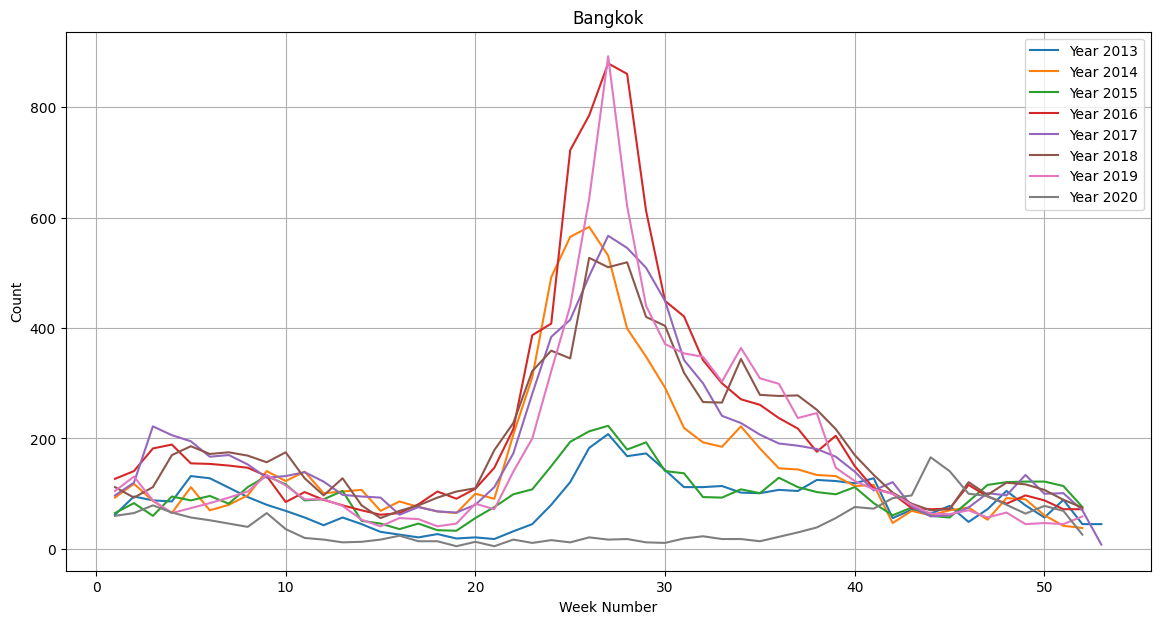

In [6]:
province = "Bangkok"
province_df = train_df[train_df['PROVINCE'] == province]
years = [2013,2014,2015,2016,2017,2018,2019,2020] #* select year 2013-2020
province_df = province_df[province_df['Year'].isin(years)]
pplot(province_df,province)

In [7]:
X = province_df[['Year','PROVINCE','Week_no']]
y = province_df['Count']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val

#*
Bangkok_predictor = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
#*
leaderboard = Bangkok_predictor.leaderboard(val_data, extra_metrics=['rmse'])
leaderboard

No path specified. Models will be saved in: "AutogluonModels/ag-20240803_082950"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.98 GB / 12.67 GB (86.6%)
Disk Space Avail:   76.68 GB / 107.72 GB (71.2%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : F

[1000]	valid_set's rmse: 101.589
[2000]	valid_set's rmse: 100.558


	-100.5029	 = Validation score   (-root_mean_squared_error)
	1.79s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 64.3615
[2000]	valid_set's rmse: 61.2467
[3000]	valid_set's rmse: 59.6789
[4000]	valid_set's rmse: 58.6563
[5000]	valid_set's rmse: 58.0735
[6000]	valid_set's rmse: 58.0054
[7000]	valid_set's rmse: 57.9961
[8000]	valid_set's rmse: 57.7021
[9000]	valid_set's rmse: 57.7455
[10000]	valid_set's rmse: 57.8508


	-57.6431	 = Validation score   (-root_mean_squared_error)
	1.79s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-51.6657	 = Validation score   (-root_mean_squared_error)
	0.71s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: CatBoost ...
		
Fitting model: ExtraTreesMSE ...
	-57.3365	 = Validation score   (-root_mean_squared_error)
	0.81s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-115.4007	 = Validation score   (-root_mean_squared_error)
	1.45s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: XGBoost ...
	-49.548	 = Validation score   (-root_mean_squared_error)
	0.74s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-48.4052	 = Validation score   (-root_mean_squared_error)
	10.69s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBMLarge ...


[1000]	valid_set's rmse: 51.7581


	-51.697	 = Validation score   (-root_mean_squared_error)
	1.21s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'NeuralNetTorch': 0.542, 'XGBoost': 0.458}
	-45.5414	 = Validation score   (-root_mean_squared_error)
	0.03s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 25.98s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 5027.3 rows/s (67 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20240803_082950")


,model,score_test,root_mean_squared_error,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMLarge,-59.049735,-59.049735,-51.696952,root_mean_squared_error,0.051974,0.012606,1.212398,0.051974,0.012606,1.212398,1,True,10
1,XGBoost,-59.363237,-59.363237,-49.548037,root_mean_squared_error,0.034930,0.007438,0.743349,0.034930,0.007438,0.743349,1,True,8
2,LightGBM,-61.688863,-61.688863,-57.643147,root_mean_squared_error,0.145351,0.040417,1.785788,0.145351,0.040417,1.785788,1,True,4
3,ExtraTreesMSE,-65.299972,-65.299972,-57.336533,root_mean_squared_error,0.079518,0.066684,0.812737,0.079518,0.066684,0.812737,1,True,6
4,RandomForestMSE,-71.310050,-71.310050,-51.665666,root_mean_squared_error,0.098356,0.067090,0.707775,0.098356,0.067090,0.707775,1,True,5
5,WeightedEnsemble_L2,-76.360637,-76.360637,-45.541434,root_mean_squared_error,0.045555,0.013327,11.464079,0.003507,0.000968,0.026937,2,True,11
6,NeuralNetTorch,-92.931981,-92.931981,-48.405163,root_mean_squared_error,0.007118,0.004922,10.693794,0.007118,0.004922,10.693794,1,True,9
7,LightGBMXT,-97.291548,-97.291548,-100.502880,root_mean_squared_error,0.026408,0.007382,1.789588,0.026408,0.007382,1.789588,1,True,3
8,KNeighborsDist,-99.565601,-99.565601,-99.472440,root_mean_squared_error,0.013129,0.012808,0.006283,0.013129,0.012808,0.006283,1,True,2
9,KNeighborsUnif,-101.750617,-101.750617,-103.962197,root_mean_squared_error,0.013839,0.014486,5.116819,0.013839,0.014486,5.116819,1,True,1


In [8]:
#*
y_pred = Bangkok_predictor.predict(X_val)

rmse_value = rmse(y_val, y_pred)
print(f"RMSE: {rmse_value}")

RMSE: 76.36063676449949


<hr>

## Yala

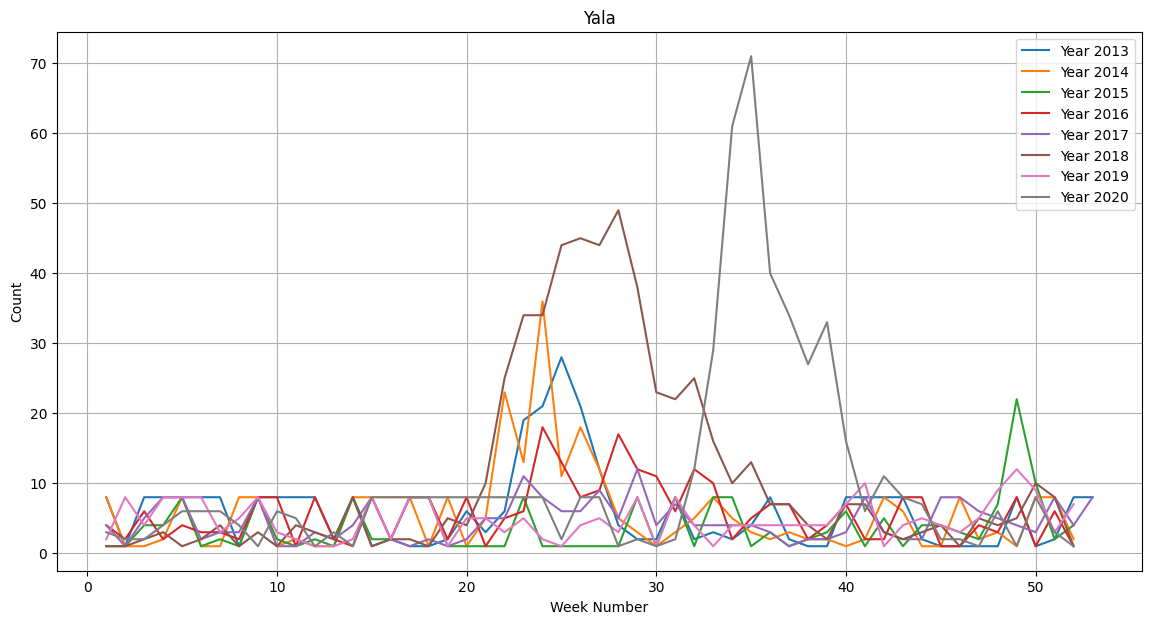

In [9]:
province = "Yala" #*
province_df = train_df[train_df['PROVINCE'] == province]
years = [2013,2014,2015,2016,2017,2018,2019,2020] #* select year that is outliner
province_df = province_df[province_df['Year'].isin(years)]
pplot(province_df,province)

In [12]:
X = province_df[['Year','PROVINCE','Week_no']]
y = province_df['Count']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val

#*
Yala_predictor = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
#*
leaderboard = Yala_predictor.leaderboard(val_data, extra_metrics=['rmse'])
#*
y_pred = Yala_predictor.predict(X_val)
rmse_value = rmse(y_val, y_pred)
print(f"\nRMSE: {rmse_value}")

leaderboard

No path specified. Models will be saved in: "AutogluonModels/ag-20240803_083301"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.49 GB / 12.67 GB (82.8%)
Disk Space Avail:   76.63 GB / 107.72 GB (71.1%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : F

[1000]	valid_set's rmse: 6.17575
[2000]	valid_set's rmse: 5.55541
[3000]	valid_set's rmse: 5.26576
[4000]	valid_set's rmse: 5.10948
[5000]	valid_set's rmse: 5.08091


	-5.0658	 = Validation score   (-root_mean_squared_error)
	1.11s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-4.824	 = Validation score   (-root_mean_squared_error)
	0.58s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: CatBoost ...
		
Fitting model: ExtraTreesMSE ...
	-5.0046	 = Validation score   (-root_mean_squared_error)
	0.59s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-7.8577	 = Validation score   (-root_mean_squared_error)
	0.58s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: XGBoost ...
	-5.545	 = Validation score   (-root_mean_squared_error)
	0.17s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-4.984	 = Validation score   (-root_mean_squared_error)
	8.32s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBMLarge ...


[1000]	valid_set's rmse: 4.73197


	-4.7236	 = Validation score   (-root_mean_squared_error)
	0.88s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'LightGBMLarge': 0.6, 'NeuralNetTorch': 0.36, 'RandomForestMSE': 0.04}
	-4.554	 = Validation score   (-root_mean_squared_error)
	0.03s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 13.9s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 726.8 rows/s (67 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20240803_083301")


RMSE: 5.440995573277607


,model,score_test,root_mean_squared_error,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM,-5.406757,-5.406757,-5.065772,root_mean_squared_error,0.131442,0.021832,1.109756,0.131442,0.021832,1.109756,1,True,4
1,WeightedEnsemble_L2,-5.440996,-5.440996,-4.553994,root_mean_squared_error,0.202910,0.092186,9.803838,0.005620,0.000772,0.026037,2,True,11
2,LightGBMLarge,-5.465451,-5.465451,-4.723563,root_mean_squared_error,0.093526,0.011969,0.880997,0.093526,0.011969,0.880997,1,True,10
3,ExtraTreesMSE,-5.534791,-5.534791,-5.004607,root_mean_squared_error,0.073564,0.075415,0.586735,0.073564,0.075415,0.586735,1,True,6
4,RandomForestMSE,-5.575039,-5.575039,-4.824039,root_mean_squared_error,0.093993,0.075327,0.576444,0.093993,0.075327,0.576444,1,True,5
5,NeuralNetTorch,-6.544831,-6.544831,-4.984048,root_mean_squared_error,0.009771,0.004117,8.320359,0.009771,0.004117,8.320359,1,True,9
6,XGBoost,-6.549694,-6.549694,-5.545009,root_mean_squared_error,0.021110,0.003267,0.173724,0.021110,0.003267,0.173724,1,True,8
7,KNeighborsDist,-7.363819,-7.363819,-7.758207,root_mean_squared_error,0.014969,0.013857,0.009135,0.014969,0.013857,0.009135,1,True,2
8,KNeighborsUnif,-7.695546,-7.695546,-8.237374,root_mean_squared_error,0.014340,0.026255,0.008014,0.014340,0.026255,0.008014,1,True,1
9,LightGBMXT,-7.896448,-7.896448,-8.369467,root_mean_squared_error,0.003113,0.000946,0.314475,0.003113,0.000946,0.314475,1,True,3


<hr>

# Predict switching

In [13]:
test_df

,_id,Disease,Year,PROVINCE,Week_no
0,32187,Hand Foot Mouth,2021,Bangkok,1
1,32188,Hand Foot Mouth,2021,Bangkok,2
2,32189,Hand Foot Mouth,2021,Bangkok,3
3,32190,Hand Foot Mouth,2021,Bangkok,4
4,32191,Hand Foot Mouth,2021,Bangkok,5
...,...,...,...,...,...
11198,43385,Hand Foot Mouth,2023,Narathiwat,37
11199,43386,Hand Foot Mouth,2023,Narathiwat,38
11200,43387,Hand Foot Mouth,2023,Narathiwat,39
11201,43388,Hand Foot Mouth,2023,Narathiwat,40


In [14]:
submit_df

,_id,Pred
0,32187,32.0
1,32188,13.0
2,32189,17.0
3,32190,NaN
4,32191,NaN
...,...,...
11198,43385,NaN
11199,43386,NaN
11200,43387,NaN
11201,43388,NaN


In [15]:
df = pd.read_csv("/content/sample_submission.csv")
for idx,row in df[:5].iterrows():
    data = test_df[test_df['_id']==row['_id']].drop(columns=['_id'])
    # print(data.PROVINCE)
    province = data.PROVINCE.iloc[0]
    # print(province)
    if province == "Bangkok":
        print("bkk")
        df.at[idx,'Pred'] = Bangkok_predictor.predict(data)
    elif province == "Yala":
        print("YL")
        df.at[idx,'Pred'] = Yala_predictor.predict(data)
    else:
        df.at[idx,'Pred'] = "???"

bkk
bkk


<ipython-input-15-4b3bde814755>:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df.at[idx,'Pred'] = Bangkok_predictor.predict(data)
<ipython-input-15-4b3bde814755>:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df.at[idx,'Pred'] = Bangkok_predictor.predict(data)


bkk
bkk


<ipython-input-15-4b3bde814755>:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df.at[idx,'Pred'] = Bangkok_predictor.predict(data)
<ipython-input-15-4b3bde814755>:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df.at[idx,'Pred'] = Bangkok_predictor.predict(data)


bkk


<ipython-input-15-4b3bde814755>:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df.at[idx,'Pred'] = Bangkok_predictor.predict(data)


In [16]:
df

,_id,Pred
0,32187,37.460960
1,32188,43.860512
2,32189,17.510857
3,32190,21.539778
4,32191,22.432209
...,...,...
11198,43385,NaN
11199,43386,NaN
11200,43387,NaN
11201,43388,NaN
